# Section one
**Data Pereparation**

In this section I am trying to gather all the datasets together and make the desired variables including "number of Covid-19 cases","number of deaths", "Air Quality Index", "tempreture", "wind, "GDP", and "unemployment rate" by county.

All the data sets include dates starting from January 2020 to May/June 2020. 

In [2]:
## importing the data on number of confimed cases by county from CDC 
import pandas as pd
confirmed=pd.read_excel("Capstone Data/covid_confirmed_usafacts.xlsx")

## using pandas "melt" function I am trying to chnage the format of the dataframe from wide to long. 
#In other words, I am converting date columns into date row.
confirmed2=pd.melt(confirmed, id_vars=['countyFIPS','County Name','State','stateFIPS'],value_vars=confirmed.columns[4:])
confirmed2['variable']= confirmed2['variable'].astype('str')
confirmed2.head()

,countyFIPS,County Name,State,stateFIPS,variable,value
0,0,Statewide Unallocated,AL,1,2020-01-22,0
1,1001,Autauga County,AL,1,2020-01-22,0
2,1003,Baldwin County,AL,1,2020-01-22,0
3,1005,Barbour County,AL,1,2020-01-22,0
4,1007,Bibb County,AL,1,2020-01-22,0


In [3]:
#### Using groupby and aggregate functions I am trying to make sure that each county has a usique county FIPS code. 
confirmed2.groupby(['State','County Name']).agg(['min','max','count','nunique'])

countyFIPS                      stateFIPS  \
                                        min    max count nunique       min   
State County Name                                                            
AK    Aleutians East Borough           2013   2013   159       1         2   
      Aleutians West Census Area       2016   2016   159       1         2   
      Bethel Census Area               2050   2050   159       1         2   
      Bristol Bay Borough              2060   2060   159       1         2   
      City and Borough of Juneau       2110   2110   159       1         2   
...                                     ...    ...   ...     ...       ...   
WY    Sweetwater County               56037  56037   159       1        56   
      Teton County                    56039  56039   159       1        56   
      Uinta County                    56041  56041   159       1        56   
      Washakie County                 56043  56043   159       1        56   
      Weston County                   56045  56045   159       1        56   

                                                      variable              \
                                 max count nunique         min         max   
State County Name                                                            
AK    Aleutians East Borough       2   159       1  2020-01-22  2020-06-28   
      Aleutians West Census Area   2   159       1  2020-01-22  2020-06-28   
      Bethel Census Area           2   159       1  2020-01-22  2020-06-28   
      Bristol Bay Borough          2   159       1  2020-01-22  2020-06-28   
      City and Borough of Juneau   2   159       1  2020-01-22  2020-06-28   
...                               ..   ...     ...         ...         ...   
WY    Sweetwater County           56   159       1  2020-01-22  2020-06-28   
      Teton County                56   159       1  2020-01-22  2020-06-28   
      Uinta County                56   159       1  2020-01-22  2020-06-28   
      Washakie County             56   159       1  2020-01-22  2020-06-28   
      Weston County               56   159       1  2020-01-22  2020-06-28   

                                               value                     
                                 count nunique   min  max count nunique  
State County Name                                                        
AK    Aleutians East Borough       159     159     0    0   159       1  
      Aleutians West Census Area   159     159     0    0   159       1  
      Bethel Census Area           159     159     0    6   159       7  
      Bristol Bay Borough          159     159     0    0   159       1  
      City and Borough of Juneau   159     159     0   44   159      31  
...                                ...     ...   ...  ...   ...     ...  
WY    Sweetwater County            159     159     0   82   159      41  
      Teton County                 159     159     0  123   159      46  
      Uinta County                 159     159     0  168   159      34  
      Washakie County              159     159     0   39   159      16  
      Weston County                159     159     0    1   159       2  

[3195 rows x 16 columns]

In [4]:
### Using this code below I am trying to detect any county that has more than one county FIPS in the dataset.
a=[confirmed2.groupby(['State','County Name']).agg(['min','max','count','nunique']).countyFIPS['nunique']][0]
for i in a:
    if i!=1:
        print(i)

In [5]:
#confirmed2['New_CFIPS']=confirmed2['countyFIPS'].astype('str')[-3:]
confirmed2=confirmed2.rename(columns={'value':'cases'})
confirmed2.head()

,countyFIPS,County Name,State,stateFIPS,variable,cases
0,0,Statewide Unallocated,AL,1,2020-01-22,0
1,1001,Autauga County,AL,1,2020-01-22,0
2,1003,Baldwin County,AL,1,2020-01-22,0
3,1005,Barbour County,AL,1,2020-01-22,0
4,1007,Bibb County,AL,1,2020-01-22,0


In [6]:
### importing the data on number of deaths by county
deaths=pd.read_excel("Capstone Data/covid_deaths_usafacts.xlsx")

#### Melting the data frame from wide to long, same as Confimed cases data set.
# both of these data sets above were generated by CDC and had the same format, 
#which was different from the format for other datasets, so I had to change it.
deaths2=pd.melt(deaths, id_vars=['countyFIPS','County Name','State','stateFIPS'],value_vars=deaths.columns[4:])
deaths2['variable'] = deaths2['variable'].astype(str)
deaths2=deaths2.rename(columns={'value':'deaths'})
deaths2=deaths2.rename(columns={'variable':'DeathDates'})
deaths2.head()

,countyFIPS,County Name,State,stateFIPS,DeathDates,deaths
0,0,Statewide Unallocated,AL,1,2020-01-22,0
1,1001,Autauga County,AL,1,2020-01-22,0
2,1003,Baldwin County,AL,1,2020-01-22,0
3,1005,Barbour County,AL,1,2020-01-22,0
4,1007,Bibb County,AL,1,2020-01-22,0


In [7]:
deaths2.groupby(['State','County Name']).agg(['min','max','count','nunique'])

countyFIPS                      stateFIPS  \
                                        min    max count nunique       min   
State County Name                                                            
AK    Aleutians East Borough           2013   2013   159       1         2   
      Aleutians West Census Area       2016   2016   159       1         2   
      Bethel Census Area               2050   2050   159       1         2   
      Bristol Bay Borough              2060   2060   159       1         2   
      City and Borough of Juneau       2110   2110   159       1         2   
...                                     ...    ...   ...     ...       ...   
WY    Sweetwater County               56037  56037   159       1        56   
      Teton County                    56039  56039   159       1        56   
      Uinta County                    56041  56041   159       1        56   
      Washakie County                 56043  56043   159       1        56   
      Weston County                   56045  56045   159       1        56   

                                                    DeathDates              \
                                 max count nunique         min         max   
State County Name                                                            
AK    Aleutians East Borough       2   159       1  2020-01-22  2020-06-28   
      Aleutians West Census Area   2   159       1  2020-01-22  2020-06-28   
      Bethel Census Area           2   159       1  2020-01-22  2020-06-28   
      Bristol Bay Borough          2   159       1  2020-01-22  2020-06-28   
      City and Borough of Juneau   2   159       1  2020-01-22  2020-06-28   
...                               ..   ...     ...         ...         ...   
WY    Sweetwater County           56   159       1  2020-01-22  2020-06-28   
      Teton County                56   159       1  2020-01-22  2020-06-28   
      Uinta County                56   159       1  2020-01-22  2020-06-28   
      Washakie County             56   159       1  2020-01-22  2020-06-28   
      Weston County               56   159       1  2020-01-22  2020-06-28   

                                               deaths                    
                                 count nunique    min max count nunique  
State County Name                                                        
AK    Aleutians East Borough       159     159      0   0   159       1  
      Aleutians West Census Area   159     159      0   0   159       1  
      Bethel Census Area           159     159      0   0   159       1  
      Bristol Bay Borough          159     159      0   0   159       1  
      City and Borough of Juneau   159     159      0   0   159       1  
...                                ...     ...    ...  ..   ...     ...  
WY    Sweetwater County            159     159      0   0   159       1  
      Teton County                 159     159      0   1   159       2  
      Uinta County                 159     159      0   0   159       1  
      Washakie County              159     159      0   5   159       5  
      Weston County                159     159      0   0   159       1  

[3195 rows x 16 columns]

In [19]:
# number of unique counties
len(set(deaths2['countyFIPS']))

3146

In [9]:
### checking whether if there is a non unique county FIPS code for each county. 
b=[deaths2.groupby(['State','County Name']).agg(['min','max','count','nunique']).countyFIPS['nunique']][0]
for i in b:
    if i!=1:
        print(i)

In [12]:
###### importing AQI data by county 
import matplotlib.pyplot as plt
AQI2020=pd.read_csv("Capstone Data/daily_aqi_by_county_2020.csv",header=0)#,index_col='Date')
AQI2020.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2020-01-01,48,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2020-01-04,13,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2020-01-07,14,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2020-01-10,39,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2020-01-13,29,Good,PM2.5,01-003-0010,1


There was a important differentce between county FIPS codes in data sets from CDC (number of cases and number of deaths) and the other datasets from EPA(AQI, Wind, Tempreture) and BLS (GDP, UR). The county FIPS codes by the second group was only including the code for the county, however the FIPS codes from the CDC data sets were based on StateCode+CountyCode format. So I decided to define a new "countyFIPs" variable to be able to merge two datasets on that.

In [13]:
### creating new countyFIPS variable.
AQI2020['countyFIPS']=(AQI2020['State Code']*1000)+AQI2020['County Code']
len(set(AQI2020['countyFIPS']))

628

In [14]:
AQI2020.groupby(['State Name','county Name']).agg(['min','max','count','nunique'])

State Code                   County Code            \
                              min max count nunique         min max count   
State Name county Name                                                      
Alabama    Baldwin              1   1    11       1           3   3    11   
           Clay                 1   1     5       1          27  27     5   
           DeKalb               1   1    59       1          49  49    59   
           Etowah               1   1     8       1          55  55     8   
           Jefferson            1   1    32       1          73  73    32   
...                           ...  ..   ...     ...         ...  ..   ...   
Wyoming    Lincoln             56  56    91       1          23  23    91   
           Sublette            56  56    59       1          35  35    59   
           Sweetwater          56  56    91       1          37  37    91   
           Teton               56  56    60       1          39  39    60   
           Uinta               56  56    91       1          41  41    91   

                                      Date              ... Defining Site  \
                       nunique         min         max  ...         count   
State Name county Name                                  ...                 
Alabama    Baldwin           1  2020-01-01  2020-01-31  ...            11   
           Clay              1  2020-01-04  2020-01-28  ...             5   
           DeKalb            1  2020-01-01  2020-02-29  ...            59   
           Etowah            1  2020-01-01  2020-01-31  ...             8   
           Jefferson         1  2020-01-01  2020-02-01  ...            32   
...                        ...         ...         ...  ...           ...   
Wyoming    Lincoln           1  2020-01-01  2020-03-31  ...            91   
           Sublette          1  2020-01-01  2020-02-29  ...            59   
           Sweetwater        1  2020-01-01  2020-03-31  ...            91   
           Teton             1  2020-01-01  2020-02-29  ...            60   
           Uinta             1  2020-01-01  2020-03-31  ...            91   

                               Number of Sites Reporting                    \
                       nunique                       min max count nunique   
State Name county Name                                                       
Alabama    Baldwin           1                         1   1    11       1   
           Clay              1                         1   1     5       1   
           DeKalb            2                         1   2    59       2   
           Etowah            1                         1   1     8       1   
           Jefferson         4                         2   4    32       3   
...                        ...                       ...  ..   ...     ...   
Wyoming    Lincoln           1                         1   1    91       1   
           Sublette          1                         1   1    59       1   
           Sweetwater        2                         2   2    91       1   
           Teton             2                         2   3    60       2   
           Uinta             2                         2   2    91       1   

                       countyFIPS                       
                              min    max count nunique  
State Name county Name                                  
Alabama    Baldwin           1003   1003    11       1  
           Clay              1027   1027     5       1  
           DeKalb            1049   1049    59       1  
           Etowah            1055   1055     8       1  
           Jefferson         1073   1073    32       1  
...                           ...    ...   ...     ...  
Wyoming    Lincoln          56023  56023    91       1  
           Sublette         56035  56035    59       1  
           Sweetwater       56037  56037    91       1  
           Teton            56039  56039    60       1  
           Uinta            560

In [16]:
### checking for uniqueness of the countyFIPS variable for each county
c=[AQI2020.groupby(['State Name','county Name']).agg(['min','max','count','nunique']).countyFIPS['nunique']][0]
for i in c:
    if i!=1:
        print(i)

In [17]:
#### importing tempreture dataset from EPA
temp=pd.read_csv('Capstone Data/daily_TEMP_2020.csv')
temp=temp.rename(columns = {'Date Local':'Date'})
temp=temp.drop(columns=['Site Num',\
                     'Parameter Code','POC','Latitude','Longitude','Datum','Sample Duration','Pollutant Standard',\
                     'Event Type','Observation Count','1st Max Value','1st Max Hour','Method Code','Method Name',\
                     'Local Site Name','Address','City Name','CBSA Name','Date of Last Change','AQI','Observation Percent',\
                       'Parameter Name'])

### creating the countyFIPS variable
temp['countyFIPS']=(temp['State Code']*1000)+temp['County Code']
temp.head()

,State Code,County Code,Date,Units of Measure,Arithmetic Mean,State Name,County Name,countyFIPS
0,1,73,2020-01-01,Degrees Fahrenheit,45.995833,Alabama,Jefferson,1073
1,1,73,2020-01-02,Degrees Fahrenheit,54.229167,Alabama,Jefferson,1073
2,1,73,2020-01-03,Degrees Fahrenheit,58.745833,Alabama,Jefferson,1073
3,1,73,2020-01-04,Degrees Fahrenheit,49.229167,Alabama,Jefferson,1073
4,1,73,2020-01-05,Degrees Fahrenheit,43.904167,Alabama,Jefferson,1073


In [18]:
#### checking for uniqueness of the countyFIPS variable for each county
d=[temp.groupby(['State Name','County Name']).agg(['min','max','count','nunique']).countyFIPS['nunique']][0]
for i in d:
    if i!=1:
        print(i)

In [22]:
## number of unique counties
len(set(temp['countyFIPS']))

255

In [20]:
### importing the wind dataset from EPA
wind=pd.read_csv('Capstone Data/daily_WIND_2020.csv')
wind=wind.rename(columns = {'Date Local':'Date'})
wind=wind.drop(columns=['Site Num',\
                     'Parameter Code','POC','Latitude','Longitude','Datum','Sample Duration','Pollutant Standard',\
                     'Event Type','Observation Count','1st Max Value','1st Max Hour','Method Code','Method Name',\
                     'Local Site Name','Address','City Name','CBSA Name','Date of Last Change','AQI','Observation Percent',\
                       'Parameter Name'])

## creating the new countyFIPS variable
wind['countyFIPS']=(wind['State Code']*1000)+wind['County Code']
wind.head()

,State Code,County Code,Date,Units of Measure,Arithmetic Mean,State Name,County Name,countyFIPS
0,1,73,2020-01-01,Knots,1.945833,Alabama,Jefferson,1073
1,1,73,2020-01-02,Knots,4.829167,Alabama,Jefferson,1073
2,1,73,2020-01-03,Knots,2.458333,Alabama,Jefferson,1073
3,1,73,2020-01-04,Knots,5.962500,Alabama,Jefferson,1073
4,1,73,2020-01-05,Knots,2.408333,Alabama,Jefferson,1073


In [21]:
#### checking for uniqueness of the countyFIPS variable for each county
e=[wind.groupby(['State Name','County Name']).agg(['min','max','count','nunique']).countyFIPS['nunique']][0]
for i in e:
    if i!=1:
        print(i)

In [22]:
# Merging wind and tempreture data sets based on date and coutyFIPS
temp_wind=pd.merge(right=temp, how='inner',left=wind,right_on=['Date','countyFIPS'],\
                left_on=['Date','countyFIPS'])
temp_wind.head()

,State Code_x,County Code_x,Date,Units of Measure_x,Arithmetic Mean_x,State Name_x,County Name_x,countyFIPS,State Code_y,County Code_y,Units of Measure_y,Arithmetic Mean_y,State Name_y,County Name_y
0,1,73,2020-01-01,Knots,1.945833,Alabama,Jefferson,1073,1,73,Degrees Fahrenheit,45.995833,Alabama,Jefferson
1,1,73,2020-01-01,Knots,1.945833,Alabama,Jefferson,1073,1,73,Degrees Fahrenheit,45.770833,Alabama,Jefferson
2,1,73,2020-01-01,Degrees Compass,199.041667,Alabama,Jefferson,1073,1,73,Degrees Fahrenheit,45.995833,Alabama,Jefferson
3,1,73,2020-01-01,Degrees Compass,199.041667,Alabama,Jefferson,1073,1,73,Degrees Fahrenheit,45.770833,Alabama,Jefferson
4,1,73,2020-01-01,Knots,0.712500,Alabama,Jefferson,1073,1,73,Degrees Fahrenheit,45.995833,Alabama,Jefferson


In [23]:
### number of the unique coutyFIPS in the merged dataset
len(set(temp_wind['countyFIPS']))

212

In [24]:
#### checking for uniqueness of the countyFIPS variable for each county
f=[temp_wind.groupby(['State Name_x','County Name_x']).agg(['min','max','count','nunique']).countyFIPS['nunique']][0]
for i in f:
    if i!=1:
        print(i)

In [25]:
### merging the previos datset (wind and temp) with the AQI dataset
AQI_temp_wind=pd.merge(right=temp_wind, how='inner',left=AQI2020,right_on=['Date','countyFIPS'],\
                left_on=['Date','countyFIPS'])
AQI_temp_wind.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,...,Units of Measure_x,Arithmetic Mean_x,State Name_x,County Name_x,State Code_y,County Code_y,Units of Measure_y,Arithmetic Mean_y,State Name_y,County Name_y
0,Alabama,Jefferson,1,73,2020-01-01,31,Good,Ozone,01-073-0023,4,...,Knots,1.945833,Alabama,Jefferson,1,73,Degrees Fahrenheit,45.995833,Alabama,Jefferson
1,Alabama,Jefferson,1,73,2020-01-01,31,Good,Ozone,01-073-0023,4,...,Knots,1.945833,Alabama,Jefferson,1,73,Degrees Fahrenheit,45.770833,Alabama,Jefferson
2,Alabama,Jefferson,1,73,2020-01-01,31,Good,Ozone,01-073-0023,4,...,Degrees Compass,199.041667,Alabama,Jefferson,1,73,Degrees Fahrenheit,45.995833,Alabama,Jefferson
3,Alabama,Jefferson,1,73,2020-01-01,31,Good,Ozone,01-073-0023,4,...,Degrees Compass,199.041667,Alabama,Jefferson,1,73,Degrees Fahrenheit,45.770833,Alabama,Jefferson
4,Alabama,Jefferson,1,73,2020-01-01,31,Good,Ozone,01-073-0023,4,...,Knots,0.712500,Alabama,Jefferson,1,73,Degrees Fahrenheit,45.995833,Alabama,Jefferson


In [26]:
## number of the unique countyFIPS int the merged dataset. As we cans see the number of counties drops. 
len(set(AQI_temp_wind['countyFIPS']))

185

In [27]:
#### checking for uniqueness of the countyFIPS variable for each county
g=[AQI_temp_wind.groupby(['State Name_x','County Name_x']).agg(['min','max','count','nunique']).countyFIPS['nunique']][0]
for i in g:
    if i!=1:
        print(i)

In [28]:
### importing the UR datset by BLS
employment=pd.read_excel('Capstone Data/Monthly_UR_county_2019_2020.xlsx',sheet_name='2020')
## creating the new countyFIPS variable
employment['countyFIPS']=(employment['State FIPS']*1000)+employment['County FIPS']
employment['Date']=employment['Date'].astype('str')
employment.head()

,LAUS Code,State FIPS,County FIPS,County Name/State Abbreviation,Period,Labor Force,Employed,Unemployed,Unemployment Rate (%),Date,countyFIPS
0,CN0100100000000,1,1,"Autauga County, AL",Jan-20,25912,25125,787,3,2020-01-01,1001
1,CN0100300000000,1,3,"Baldwin County, AL",Jan-20,95316,92389,2927,3.1,2020-01-01,1003
2,CN0100500000000,1,5,"Barbour County, AL",Jan-20,8509,8186,323,3.8,2020-01-01,1005
3,CN0100700000000,1,7,"Bibb County, AL",Jan-20,8629,8342,287,3.3,2020-01-01,1007
4,CN0100900000000,1,9,"Blount County, AL",Jan-20,25098,24352,746,3,2020-01-01,1009


In [29]:
## number of unique counties in the dataset
len(set(employment['countyFIPS']))

3219

In [30]:
#### checking for uniqueness of the countyFIPS variable for each county
h=[employment.groupby(['County Name/State Abbreviation']).agg(['min','max','count','nunique']).countyFIPS['nunique']][0]
for i in h:
    if i!=1:
        print(i)

In [31]:
#### merging the UR with the last merged dataset (AQI_wind_temp)
AQI_temp_wind_UR=pd.merge(right=AQI_temp_wind, how='right',left=employment,right_on=['Date','countyFIPS']\
                          ,left_on=['Date','countyFIPS'])
AQI_temp_wind_UR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93843 entries, 0 to 93842
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LAUS Code                       7747 non-null   object 
 1   State FIPS                      7747 non-null   float64
 2   County FIPS                     7747 non-null   float64
 3   County Name/State Abbreviation  7747 non-null   object 
 4   Period                          7747 non-null   object 
 5   Labor Force                     7747 non-null   object 
 6   Employed                        7747 non-null   object 
 7   Unemployed                      7747 non-null   object 
 8   Unemployment Rate (%)           7747 non-null   object 
 9   Date                            93843 non-null  object 
 10  countyFIPS                      93843 non-null  int64  
 11  State Name                      93843 non-null  object 
 12  county Name                     

In [32]:
## number of unique counties in the merged dataset
len(set(AQI_temp_wind_UR['countyFIPS']))

185

In [39]:
#### checking for uniqueness of the countyFIPS variable for each county
j=[AQI_temp_wind_UR.groupby(['State Name','county Name']).agg(['min','max','count','nunique']).countyFIPS['nunique']][0]
for i in j:
    if i!=1:
        print(i)

*Filling the UR and GDP data*

The data on unempoyment rate(UR) and GDP is reported monthly and quarterly, repectively. Therefore, in order to prevent loosing data on other variable I tried to consider constant values per month and per quarter for dates available in the dataset. I used pandas "fillna" function for do so with the forward filling method. This way, for each NaN value of the UR and GDP in the dataset, it will fill it with previous observation. Since the dataset is sorted by county and date therefore, it will fill with the right value for each county.

In [35]:
AQI_temp_wind_UR_filled = AQI_temp_wind_UR.fillna(method='ffill')
AQI_temp_wind_UR_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93843 entries, 0 to 93842
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LAUS Code                       93843 non-null  object 
 1   State FIPS                      93843 non-null  float64
 2   County FIPS                     93843 non-null  float64
 3   County Name/State Abbreviation  93843 non-null  object 
 4   Period                          93843 non-null  object 
 5   Labor Force                     93843 non-null  int64  
 6   Employed                        93843 non-null  int64  
 7   Unemployed                      93843 non-null  int64  
 8   Unemployment Rate (%)           93843 non-null  float64
 9   Date                            93843 non-null  object 
 10  countyFIPS                      93843 non-null  int64  
 11  State Name                      93843 non-null  object 
 12  county Name                     

In [36]:
# number of unique countyFIPS in the merged_filled dataset
len(set(AQI_temp_wind_UR_filled['countyFIPS']))

185

In [37]:
#### checking for uniqueness of the countyFIPS variable for each county
k=[AQI_temp_wind_UR_filled.groupby(['State Name','county Name']).agg(['min','max','count','nunique']).countyFIPS['nunique']][0]
for i in k:
    if i!=1:
        print(i)

In [38]:
# number of unique UR in the merged_filled dataset to make sure the filling is done will!
len(set(AQI_temp_wind_UR_filled['Unemployment Rate (%)']))

185

In [39]:
## importing the GDP dataset
GDP=pd.read_excel('Capstone Data/lagdp1219.xlsx',sheet_name='Sheet2')
GDP['Date']=GDP['Date'].astype('str')
GDP.head()

,state,county,GDP,Date
0,Alabama,Autauga,1.734989e+06,2020-01-01
1,Alabama,Baldwin,6.753560e+06,2020-01-01
2,Alabama,Barbour,9.209657e+05,2020-01-01
3,Alabama,Bibb,4.259617e+05,2020-01-01
4,Alabama,Blount,9.931166e+05,2020-01-01


In [40]:
### careting a new variable with the log of GDP, since the value for GDP is scaled differently than other variables. 
import numpy as np
GDP['GDPlog'] = np.log(GDP['GDP'])
GDP.head()

,state,county,GDP,Date,GDPlog
0,Alabama,Autauga,1.734989e+06,2020-01-01,14.366511
1,Alabama,Baldwin,6.753560e+06,2020-01-01,15.725580
2,Alabama,Barbour,9.209657e+05,2020-01-01,13.733178
3,Alabama,Bibb,4.259617e+05,2020-01-01,12.962105
4,Alabama,Blount,9.931166e+05,2020-01-01,13.808603


In [42]:
### merging the GDP with the last dataset including UR, AQI, wind and temp
AQI_temp_wind_UR_filled_GDP=pd.merge(right=AQI_temp_wind_UR_filled, how='right',left=GDP,right_on=['Date','State Name','county Name']\
                          ,left_on=['Date','state','county'])
AQI_temp_wind_UR_filled_GDP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93843 entries, 0 to 93842
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   state                           3058 non-null   object 
 1   county                          3058 non-null   object 
 2   GDP                             3058 non-null   float64
 3   Date                            93843 non-null  object 
 4   GDPlog                          3058 non-null   float64
 5   LAUS Code                       93843 non-null  object 
 6   State FIPS                      93843 non-null  float64
 7   County FIPS                     93843 non-null  float64
 8   County Name/State Abbreviation  93843 non-null  object 
 9   Period                          93843 non-null  object 
 10  Labor Force                     93843 non-null  int64  
 11  Employed                        93843 non-null  int64  
 12  Unemployed                      

In [43]:
# number of unique countyFIPS in the merged_filled dataset
len(set(AQI_temp_wind_UR_filled_GDP['countyFIPS']))

185

In [44]:
#### checking for uniqueness of the countyFIPS variable for each county
L=[AQI_temp_wind_UR_filled_GDP.groupby(['state','county']).agg(['min','max','count','nunique']).countyFIPS['nunique']][0]
for i in L:
    if i!=1:
        print(i)

In [45]:
### filling the GDP variable NaN values as described before
AQI_temp_wind_UR_filled_GDP['GDP']=AQI_temp_wind_UR_filled_GDP['GDP'].fillna(method='ffill')
AQI_temp_wind_UR_filled_GDP['GDPlog']=AQI_temp_wind_UR_filled_GDP['GDPlog'].fillna(method='ffill')
AQI_temp_wind_UR_filled_GDP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93843 entries, 0 to 93842
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   state                           3058 non-null   object 
 1   county                          3058 non-null   object 
 2   GDP                             93843 non-null  float64
 3   Date                            93843 non-null  object 
 4   GDPlog                          93843 non-null  float64
 5   LAUS Code                       93843 non-null  object 
 6   State FIPS                      93843 non-null  float64
 7   County FIPS                     93843 non-null  float64
 8   County Name/State Abbreviation  93843 non-null  object 
 9   Period                          93843 non-null  object 
 10  Labor Force                     93843 non-null  int64  
 11  Employed                        93843 non-null  int64  
 12  Unemployed                      

In [46]:
#### checking for uniqueness of the countyFIPS variable for each county
m=[AQI_temp_wind_UR_filled_GDP.groupby(['State Name','county Name']).agg(['min','max','count','nunique']).countyFIPS['nunique']][0]
for i in m:
    if i!=1:
        print(i)

In [47]:
## merging the last dataset with the dataset on number of cases
AQI_temp_wind_UR_filled_GDP_case=pd.merge(right=AQI_temp_wind_UR_filled_GDP, how='inner',left=confirmed2,\
          right_on=['Date','countyFIPS'],left_on=['variable','countyFIPS'])

In [48]:
AQI_temp_wind_UR_filled_GDP_case.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61086 entries, 0 to 61085
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   countyFIPS                      61086 non-null  int64  
 1   County Name                     61086 non-null  object 
 2   State                           61086 non-null  object 
 3   stateFIPS                       61086 non-null  int64  
 4   variable                        61086 non-null  object 
 5   cases                           61086 non-null  int64  
 6   state                           1511 non-null   object 
 7   county                          1511 non-null   object 
 8   GDP                             61086 non-null  float64
 9   Date                            61086 non-null  object 
 10  GDPlog                          61086 non-null  float64
 11  LAUS Code                       61086 non-null  object 
 12  State FIPS                      

In [49]:
# number of unique countyFIPS in the merged_filled dataset
len(set(AQI_temp_wind_UR_filled_GDP_case['countyFIPS']))

183

In [50]:
#### checking for uniqueness of the countyFIPS variable for each county
n=[AQI_temp_wind_UR_filled_GDP_case.groupby(['state','county']).agg(['min','max','count','nunique']).countyFIPS['nunique']][0]
for i in n:
    if i!=1:
        print(i)

In [51]:
### merging with the number of deaths dataset
AQI_temp_wind_UR_filled_GDP_case_death=pd.merge(right=AQI_temp_wind_UR_filled_GDP_case,\
                                                       how='inner',left=deaths2,\
          right_on=['Date','countyFIPS'],left_on=['DeathDates','countyFIPS'])
AQI_temp_wind_UR_filled_GDP_case_death.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61086 entries, 0 to 61085
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   countyFIPS                      61086 non-null  int64  
 1   County Name_x                   61086 non-null  object 
 2   State_x                         61086 non-null  object 
 3   stateFIPS_x                     61086 non-null  int64  
 4   DeathDates                      61086 non-null  object 
 5   deaths                          61086 non-null  int64  
 6   County Name_y                   61086 non-null  object 
 7   State_y                         61086 non-null  object 
 8   stateFIPS_y                     61086 non-null  int64  
 9   variable                        61086 non-null  object 
 10  cases                           61086 non-null  int64  
 11  state                           1511 non-null   object 
 12  county                          

In [53]:
# number of unique countyFIPS in the merged_filled dataset
len(set(AQI_temp_wind_UR_filled_GDP_case_death['countyFIPS']))

183

In [54]:
### droping unnecessary and duplicated variable from the final dataset
AQI_temp_wind_UR_filled_GDP_case_death=AQI_temp_wind_UR_filled_GDP_case_death.drop\
(columns=['State_x','County Name_y','State_y','stateFIPS_y','state','county','State FIPS','County FIPS',\
          'State Code','County Code','State Code_x','County Code_x','State Name_x',\
         'County Name_x','State Code_y','County Code_y','State Name_y','County Name_y'])

In [55]:
AQI_temp_wind_UR_filled_GDP_case_death.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61086 entries, 0 to 61085
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   countyFIPS                      61086 non-null  int64  
 1   stateFIPS_x                     61086 non-null  int64  
 2   DeathDates                      61086 non-null  object 
 3   deaths                          61086 non-null  int64  
 4   variable                        61086 non-null  object 
 5   cases                           61086 non-null  int64  
 6   GDP                             61086 non-null  float64
 7   Date                            61086 non-null  object 
 8   GDPlog                          61086 non-null  float64
 9   LAUS Code                       61086 non-null  object 
 10  County Name/State Abbreviation  61086 non-null  object 
 11  Period                          61086 non-null  object 
 12  Labor Force                     

In [56]:
#### checking for uniqueness of the countyFIPS variable for each county in the final dataset
p=[AQI_temp_wind_UR_filled_GDP_case_death.groupby(['State Name','county Name']).agg(['min','max','count','nunique']).countyFIPS['nunique']][0]
for i in p:
    if i!=1:
        print(i)

In [57]:
### droping more columns and renameing some of the columns
final_data=AQI_temp_wind_UR_filled_GDP_case_death.drop(columns=['DeathDates','LAUS Code','Period',\
                                                                       'Defining Site','Number of Sites Reporting',\
                                                                       'variable'])
final_data=final_data.rename(columns={'Units of Measure_x':'Units of Measure_wind','Arithmetic Mean_x':'wind',\
                                      'Units of Measure_y':'Units of Measure_temp','Arithmetic Mean_y':'temp',
                                       'Unemployment Rate (%)':'UR'})
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61086 entries, 0 to 61085
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   countyFIPS                      61086 non-null  int64  
 1   stateFIPS_x                     61086 non-null  int64  
 2   deaths                          61086 non-null  int64  
 3   cases                           61086 non-null  int64  
 4   GDP                             61086 non-null  float64
 5   Date                            61086 non-null  object 
 6   GDPlog                          61086 non-null  float64
 7   County Name/State Abbreviation  61086 non-null  object 
 8   Labor Force                     61086 non-null  int64  
 9   Employed                        61086 non-null  int64  
 10  Unemployed                      61086 non-null  int64  
 11  UR                              61086 non-null  float64
 12  State Name                      

In [58]:
final_data.groupby(['State Name','county Name']).agg(['min','max','count','nunique'])

countyFIPS                      stateFIPS_x            \
                              min    max count nunique         min max count   
State Name county Name                                                         
Alabama    Jefferson         1073   1073    80       1           1   1    80   
Alaska     Denali            2068   2068    52       1           2   2    52   
Arizona    Cochise           4003   4003    78       1           4   4    78   
           Coconino          4005   4005    78       1           4   4    78   
           Maricopa          4013   4013   550       1           4   4   550   
...                           ...    ...   ...     ...         ...  ..   ...   
Washington Walla Walla      53071  53071    20       1          53  53    20   
           Whatcom          53073  53073    40       1          53  53    40   
           Yakima           53077  53077    80       1          53  53    80   
Wyoming    Converse         56009  56009    70       1          56  56    70   
           Teton            56039  56039   702       1          56  56   702   

                               deaths      ...  wind          \
                       nunique    min max  ... count nunique   
State Name county Name                     ...                 
Alabama    Jefferson         1      0   0  ...    80      39   
Alaska     Denali            1      0   0  ...    52      52   
Arizona    Cochise           1      0   0  ...    78      77   
           Coconino          1      0   0  ...    78      76   
           Maricopa          1      0   8  ...   550     497   
...                        ...    ...  ..  ...   ...     ...   
Washington Walla Walla       1      0   0  ...    20      20   
           Whatcom           1      0   0  ...    40      40   
           Yakima            1      0   0  ...    80      40   
Wyoming    Converse          1      0   0  ...    70      70   
           Teton             1      0   0  ...   702     226   

                       Units of Measure_temp                            \
                                         min                 max count   
State Name county Name                                                   
Alabama    Jefferson      Degrees Fahrenheit  Degrees Fahrenheit    80   
Alaska     Denali         Degrees Fahrenheit  Degrees Fahrenheit    52   
Arizona    Cochise        Degrees Fahrenheit  Degrees Fahrenheit    78   
           Coconino       Degrees Fahrenheit  Degrees Fahrenheit    78   
           Maricopa       Degrees Fahrenheit  Degrees Fahrenheit   550   
...                                      ...                 ...   ...   
Washington Walla Walla    Degrees Fahrenheit  Degrees Fahrenheit    20   
           Whatcom        Degrees Fahrenheit  Degrees Fahrenheit    40   
           Yakima         Degrees Fahrenheit  Degrees Fahrenheit    80   
Wyoming    Converse       Degrees Fahrenheit  Degrees Fahrenheit    70   
           Teton          Degrees Fahrenheit  Degrees Fahrenheit   702   

                                     temp                           
                       nunique        min        max count nunique  
State Name county Name                                              
Alabama    Jefferson         1  38.287500  50.804167    80      20  
Alaska     Denali            1 -19.333333  29.916667    52      25  
Arizona    Cochise           1  27.958333  55.083333    78      39  
           Coconino          1  18.208333  47.500000    78      36  
           Maricopa          1  43.125000  73.666667   550      59  
...                        ...        ...        ...   ...     ...  
Washington Walla Walla       1  36.416667  56.791667    20      10  
           Whatcom           1  41.541667  50.291667    40      10  
           Yakima            1  36.583333  54.833333    80      20  
Wyoming    Converse          1   8.791667  50.625000    70      68  
           Teton             1  -9.166667  31.541667   702     108  

[

In [59]:
#### checking for uniqueness of the countyFIPS variable for each county
q=[final_data.groupby(['State Name','county Name']).agg(['min','max','count','nunique']).countyFIPS['nunique']][0]
for i in q:
    if i!=1:
        print(i)

*Choosing specific characteristics of the data*

Since the data on AQI and Wind included multiple parameters for each of them so I decided to only used data on one of the parameter for each data on AQi and wind

In [60]:
## set of unique parameters for measuring AQI
set(final_data['Defining Parameter'])

{'CO', 'NO2', 'Ozone', 'PM10', 'PM2.5', 'SO2'}

In [61]:
## set of unique parameters for measuring wind
set(final_data['Units of Measure_wind'])

{'Degrees Compass', 'Knots'}

In [62]:
df1=final_data[final_data['Defining Parameter']=='Ozone']#I choosed ozone since it has the maximum number of county
df=df1[df1['Units of Measure_wind']=='Degrees Compass']
df.head()

,countyFIPS,stateFIPS_x,deaths,cases,GDP,Date,GDPlog,County Name/State Abbreviation,Labor Force,Employed,...,UR,State Name,county Name,AQI,Category,Defining Parameter,Units of Measure_wind,wind,Units of Measure_temp,temp
9,4003,4,0,0,7.805383e+07,2020-01-22,18.172909,"Teton County, WY",15045,12786,...,15.0,Arizona,Cochise,34,Good,Ozone,Degrees Compass,210.916667,Degrees Fahrenheit,44.666667
11,4005,4,0,0,7.805383e+07,2020-01-22,18.172909,"Teton County, WY",15045,12786,...,15.0,Arizona,Coconino,36,Good,Ozone,Degrees Compass,298.583333,Degrees Fahrenheit,35.291667
57,4017,4,0,0,7.805383e+07,2020-01-22,18.172909,"Teton County, WY",15045,12786,...,15.0,Arizona,Navajo,35,Good,Ozone,Degrees Compass,286.666667,Degrees Fahrenheit,41.208333
65,6027,6,0,0,7.805383e+07,2020-01-22,18.172909,"Teton County, WY",15045,12786,...,15.0,California,Inyo,36,Good,Ozone,Degrees Compass,146.583333,Degrees Fahrenheit,58.958333
66,6027,6,0,0,7.805383e+07,2020-01-22,18.172909,"Teton County, WY",15045,12786,...,15.0,California,Inyo,36,Good,Ozone,Degrees Compass,146.583333,Degrees Fahrenheit,43.000000


In [63]:
## number of unique countyFIPS
len(set(df['countyFIPS']))

141

# section two:

**Defining Scenarios:**

1. First Scenario:

In the first scenario I considered the "GDPlog" and "UR" as it is in the dataset. This is the average scenario among all three scenarios.

2. Second Secario:

In the second scenario I considered the worst case in which the GDP goes down by 32.9% as reported by BLS in the second quarter of 2020. In addition, I also considered the max of 41% (in April 2020) based on the BLS reports. For the COVID cases and deaths we try to multiply them by 10.

3. Third Scenario: 

In this scenario I considered the best case in which the GDP will be the same as last quarter of the previous year. Based on the BLS data, the real GDP was 5% more in the last quarter of the 2019 relative to the first quarter of the 2020. In addition the unemployment is also considered to be 3.9 as the average UR for the 2019. For the COVID cases and deaths we try to multiply them by 0.1. 



In [65]:
df[['worst_gdp']]=df[['GDPlog']]-0.173 # this is log of 0.671
df[['worst_UR']]=df[['UR']]+26 # up to max of 41%
df[['worst_cases']]=df[['cases']]*10
df[['worst_deaths']]=df[['deaths']]*10

df[['best_gdp']]=df[['GDPlog']]+0.021 # this is log of 1.05
df[['best_UR']]=df[['UR']]-11.1  # down to 3.9%
df[['best_cases']]=df[['cases']]*0.1
df[['best_deaths']]=df[['deaths']]*0.1

df.head()

C:\Users\nasim\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,countyFIPS,stateFIPS_x,deaths,cases,GDP,Date,GDPlog,County Name/State Abbreviation,Labor Force,Employed,...,Units of Measure_temp,temp,worst_gdp,worst_UR,worst_cases,worst_deaths,best_gdp,best_UR,best_cases,best_deaths
9,4003,4,0,0,7.805383e+07,2020-01-22,18.172909,"Teton County, WY",15045,12786,...,Degrees Fahrenheit,44.666667,17.999909,41.0,0,0,18.193909,3.9,0.0,0.0
11,4005,4,0,0,7.805383e+07,2020-01-22,18.172909,"Teton County, WY",15045,12786,...,Degrees Fahrenheit,35.291667,17.999909,41.0,0,0,18.193909,3.9,0.0,0.0
57,4017,4,0,0,7.805383e+07,2020-01-22,18.172909,"Teton County, WY",15045,12786,...,Degrees Fahrenheit,41.208333,17.999909,41.0,0,0,18.193909,3.9,0.0,0.0
65,6027,6,0,0,7.805383e+07,2020-01-22,18.172909,"Teton County, WY",15045,12786,...,Degrees Fahrenheit,58.958333,17.999909,41.0,0,0,18.193909,3.9,0.0,0.0
66,6027,6,0,0,7.805383e+07,2020-01-22,18.172909,"Teton County, WY",15045,12786,...,Degrees Fahrenheit,43.000000,17.999909,41.0,0,0,18.193909,3.9,0.0,0.0


# section three:

**Plots:**
 
Our dataset is now ready for the analysis. However, here I tried to summarize some characteristics of the data with some plots before jumping into analysis.

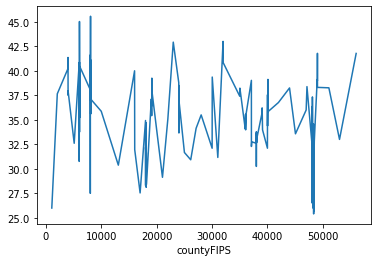

In [66]:
df.groupby('countyFIPS').mean()['AQI'].plot()

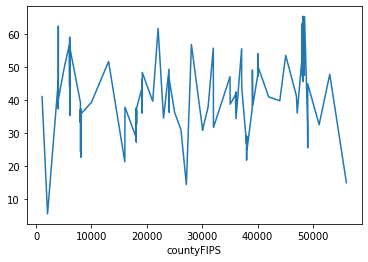

In [67]:
df.groupby('countyFIPS').mean()['temp'].plot()

*Fourier transformation of the tempreture data*


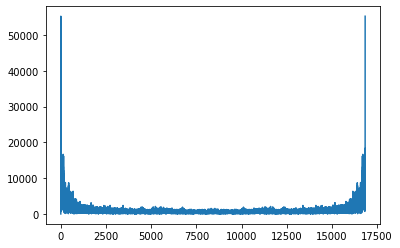

In [68]:
import scipy.fft
fft=scipy.fft.fft((df['temp'] - df['temp'].mean()).values)
plt.plot(np.abs(fft))

In [69]:
fft

array([6.80103085e-09    -0.j        , 3.02613250e+04+46202.50867466j,
       2.64450319e+03-21451.38597512j, ...,
       3.35493043e+03 -7761.57906127j, 2.64450319e+03+21451.38597512j,
       3.02613250e+04-46202.50867466j])

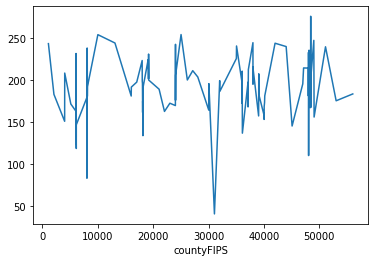

In [70]:
df.groupby('countyFIPS').mean()['wind'].plot()

*Autocorrelation plots:*

As we can see the wind variable shows almost zero autocorrelation, however, AQI and tempreture autocorrelatio plots show the most relavant lag values are about 5 to ten lags. I did not used these lag value in my analysis for now.

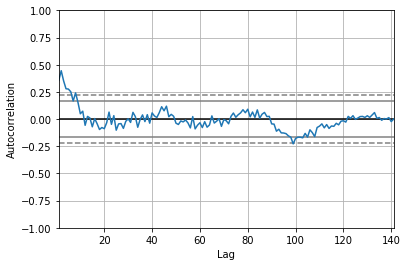

In [71]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.groupby('countyFIPS').mean()['AQI']) 

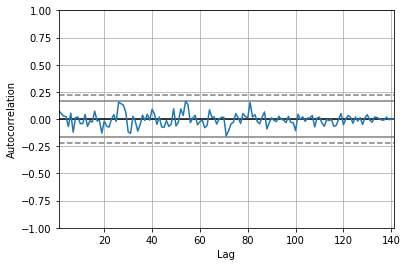

In [72]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.groupby('countyFIPS').mean()['wind'])

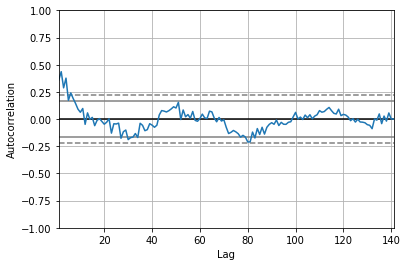

In [73]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.groupby('countyFIPS').mean()['temp'])

# Section four:

**Analysis:**

Here I start the analysis first by defining X and y data farmes for each scenario.

In [74]:
## Middle scenario
X=df

# worst case
X_worst=df[['countyFIPS','worst_gdp','worst_UR','temp','wind','worst_cases','worst_deaths']]
X_worst=X_worst.rename(columns={'worst_gdp':'GDPlog','worst_UR':'UR','worst_cases':'cases','worst_deaths':'deaths'})

# best case
X_best=df[['countyFIPS','best_gdp','best_UR','temp','wind','best_cases','best_deaths']]
X_best=X_best.rename(columns={'best_gdp':'GDPlog','best_UR':'UR','best_cases':'cases','best_deaths':'deaths'})

y=df[['AQI','countyFIPS','State Name','county Name']]

In [75]:
## Total number of unique counties avalable in the final dataset
len(set(X['countyFIPS']))

141

In [76]:
## splitting each dataset into train_test data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y)
#worst case:
X_train_worst,X_test_worst,y_train_worst,y_test_worst=train_test_split(X_worst,y)
#best case:
X_train_best,X_test_best,y_train_best,y_test_best=train_test_split(X_best,y)

*Creating the Estimator class*

Making a cutom estimator for each county by defining a class of estimators in which we generate a dictionary of estimators.

In [77]:
from sklearn import base
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder



class ByCountyEstimator(base.BaseEstimator, base.RegressorMixin):
    
    def __init__(self,column,estimator):
        self.column=column
        self.county_model={}
        self.estimator=estimator
    
    def fit(self,X,y):
        for fips in set(X[self.column]):
            X_county=X.loc[X['countyFIPS'] == fips].iloc[:,1:]
            y_county=X['AQI'].loc[X['countyFIPS']==fips]
            self.county_model[fips]=self.estimator().fit(X_county,y_county)
        return self
    
    def predict(self,X):
        #y_pred=pd.Series(list(0 for i in range(X.shape[0])))
        y_pred=np.zeros(X.shape[0])
        for fips in set(X['countyFIPS']):
            index=np.arange(0,X.shape[0])[X['countyFIPS']==fips]
            X_county=X.loc[X['countyFIPS'] == fips].iloc[:,1:]
            X_county_pred=X.iloc[index]
            y_pred[index]=self.county_model[fips].predict(X_county_pred)
        return y_pred      
    

In [78]:
## Generating a model to fit and predict

def model_factory():
     # A single estimator or a pipeline
    pipe=Pipeline([
        ('SC',FunctionTransformer(lambda X: X.filter(['GDPlog','UR','temp','wind','cases','deaths']))),
        ('ohe',OneHotEncoder(handle_unknown='ignore')),
        ('lr',LinearRegression())
    ])
    return pipe

In [80]:
scenario_one = ByCountyEstimator('countyFIPS', model_factory)
scenario_one.fit(X_train,y_train['AQI'])
scenario_one.score(X_test,y_test['AQI'])  #### score of the model

The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              


0.8591457350904966

In [81]:
# predictions for the middle scenario
y1=scenario_one.predict(X_test)
y1

array([35.11333333, 46.75379987, 44.99063599, ..., 40.99999794,
       36.29374031, 44.14479964])

In [82]:
# predictions for the worst case scenario
y2=scenario_one.predict(X_test_worst)
y2

array([39.41637631, 32.00828459, 31.40181108, ..., 31.        ,
       40.45533634, 32.99457258])

In [83]:
# predictions for the best case scenario
y3=scenario_one.predict(X_test_best)
y3

array([29.56      , 42.88113443, 41.869503  , ..., 18.51694915,
       43.16241257, 34.83604703])

In [84]:
### Gthering all the predictions together along with the original AQI

y11 = pd.DataFrame(y1)
y22 = pd.DataFrame(y2)
y33 = pd.DataFrame(y3)

#df_out = X_test.reset_index()
#df_out["Actual"] = y_test.reset_index()["AQI"]
df_out = y_test.reset_index()
df_out["middle"] =y11.reset_index()[0]
df_out["worst"] =y22.reset_index()[0]
df_out["best"] =y33.reset_index()[0]

#y_test['preds1'] = y11
#y_test['preds2'] = y22
#y_test['preds3'] = y33

#df_out2 = pd.merge(X_test,df_out,how = 'inner',on=['countyFIPS'],)
#df_out2.head()

df_out.head()

,index,AQI,countyFIPS,State Name,county Name,middle,worst,best
0,42136,31,36101,New York,Steuben,35.113333,39.416376,29.560000
1,59485,48,37119,North Carolina,Mecklenburg,46.753800,32.008285,42.881134
2,43599,45,6111,California,Ventura,44.990636,31.401811,41.869503
3,39861,36,13089,Georgia,DeKalb,29.000000,46.805099,39.163265
4,10681,31,48245,Texas,Jefferson,31.000000,37.885686,44.218182


In [85]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4210 entries, 0 to 4209
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        4210 non-null   int64  
 1   AQI          4210 non-null   int64  
 2   countyFIPS   4210 non-null   int64  
 3   State Name   4210 non-null   object 
 4   county Name  4210 non-null   object 
 5   middle       4210 non-null   float64
 6   worst        4210 non-null   float64
 7   best         4210 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 263.2+ KB


In [88]:
df_out2=df_out.groupby(['State Name','county Name']).mean()
df_out2.head()

index        AQI  countyFIPS     middle  \
State Name county Name                                                   
Alaska     Denali       27924.714286  35.142857      2068.0  38.609023   
Arizona    Cochise      20455.500000  39.125000      4003.0  40.559322   
           Coconino     25812.600000  41.100000      4005.0  41.607895   
           Maricopa     44953.272727  34.545455      4013.0  37.956989   
           Navajo       23855.750000  37.250000      4017.0  38.330943   

                            worst       best  
State Name county Name                        
Alaska     Denali       36.208742  39.667372  
Arizona    Cochise      34.753043  37.306728  
           Coconino     39.380984  39.056070  
           Maricopa     43.254987  38.622030  
           Navajo       36.234637  38.207712

# Section five:

**Final Product**

In order to be able to create a final product of an interactive map I needed to have the zipcode for each county in the dataset. Therefore, I merged the output of my analysis with a dataset that has the zipcodes for each county FIPS.

In [89]:
zipcode=pd.read_csv("Capstone Data/ZIP-COUNTY-FIPS_2010-03.csv")
zipcode.head()

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36008,Autauga County,AL,1001,H1
3,36022,Autauga County,AL,1001,H1
4,36051,Autauga County,AL,1001,H1


In [90]:
df_out3=pd.merge(right=df_out2, how='right', left=zipcode, right_on=['countyFIPS'], left_on=['STCOUNTYFP'])
df_out3.head()

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP,index,AQI,countyFIPS,middle,worst,best
0,99729,Denali Borough,AK,2068,H1,27924.714286,35.142857,2068.0,38.609023,36.208742,39.667372
1,99743,Denali Borough,AK,2068,H1,27924.714286,35.142857,2068.0,38.609023,36.208742,39.667372
2,99744,Denali Borough,AK,2068,H1,27924.714286,35.142857,2068.0,38.609023,36.208742,39.667372
3,99755,Denali Borough,AK,2068,H1,27924.714286,35.142857,2068.0,38.609023,36.208742,39.667372
4,85602,Cochise County,AZ,4003,H1,20455.500000,39.125000,4003.0,40.559322,34.753043,37.306728


In [91]:
df_out3=df_out3.drop(columns=['COUNTYNAME','STATE','CLASSFP','index','countyFIPS'])
df_out3.head()

,ZIP,STCOUNTYFP,AQI,middle,worst,best
0,99729,2068,35.142857,38.609023,36.208742,39.667372
1,99743,2068,35.142857,38.609023,36.208742,39.667372
2,99744,2068,35.142857,38.609023,36.208742,39.667372
3,99755,2068,35.142857,38.609023,36.208742,39.667372
4,85602,4003,39.125000,40.559322,34.753043,37.306728


In [93]:
### final number of counties that I can have on map
len(set(df_out3.STCOUNTYFP))

140

In [94]:
## exporting the predictions table to use it on the CARTO map website.
df_out3.to_csv(r'G:\My Drive\Data Incubator\Capstone Project\Data\predictions.csv', index = False)